## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

- 베스트상품을 주기적으로 가져와서 각 카테고리를 가져와서 어떤 종류가 인기있는지 조사하는 상품기획 업무
- 베스트상품 웹페이지를 F12로 보니 li태그 단위로 하나하나의 순위가 매겨진 걸 찾음 -> select

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [2]:
products

[<li class="first">
 <p class="no1" id="no1">1</p>
 <div class="thumb">
 <a href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669623683756" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});"><img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
 </div>
 <!--div class="goods-view">
 									<a href="http://minishop.gmarket.co.kr/roadbling"><span class="view">판매자 다른상품 보기</span>로드블링</a>
 								</div-->
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669623683756" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});">(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈</a>
 <div class="item_price">
 <div class="o-price"><span class="for-a11y">정가</span><span>43,000원</span></div>
 <div class="s-price">
 <span class="

In [3]:
len(products) #100개의 상품 -> 100개 (개수 일치) => 아하 이 태그를 이용하면 되겠구나

100

In [4]:
products[0]

<li class="first">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669623683756" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});"><img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/roadbling"><span class="view">판매자 다른상품 보기</span>로드블링</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669623683756" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});">(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈</a>
<div class="item_price">
<div class="o-price"><span class="for-a11y">정가</span><span>43,000원</span></div>
<div class="s-price">
<span class="for-a11y">할인가

In [6]:
products[0].select('a.itemname') # a태그에 클래스이름 .itemname으로 지정

[<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669623683756" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});">(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈</a>]

In [8]:
products[0].select_one('a.itemname').get_text() 
# select_one :리스트안에 있는 값만 얻는다. get_text : text만 얻음

'(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈'

In [11]:
img_tag = products[0].select_one('img.lazy') 
img_tag
# 이미지 태그 추출 -> 텍스트가 아니라 해당 텍스트를 얻고싶음 

<img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [12]:
img_tag['data-original']

'//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [13]:
img_tag['src']

'//image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [14]:
img_url = 'https:'+ img_tag['data-original']
img_url
# url을 주소창에 입력해서 사진이 나오는지 확인.

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [15]:
img_url = 'https:'+ img_tag['src']
img_url
# 이미지가 없을 때 디폴트 이미지

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [17]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [26]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

# ------------ # 상품명 # 이미지 # if, break

for index, product in enumerate(products): 
    # print(index) # 한 줄 씩 확인하며 작업해간다.
    img_tag = product.select_one('img.lazy') #이미지 태그
    # print(img_tag) 
    img_url = 'https:'+ img_tag['data-original'] # 이미지 URL 링크 만들기
    # print(img_url)
    with urlopen(img_url) as f: # 이미지 저장
        with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)  
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1 : # index는 0번부터 시작하니까 -1
        break

print('크롤링 끝-')

크롤링 끝-


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [32]:

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

# 상품명


for index, product in enumerate(products): 
    #이미지 태그
    img_tag = product.select_one('img.lazy') 
    # 이미지 URL 링크 만들기
    img_url = 'https:'+ img_tag['data-original'] 
    # 이미지 저장
    p_name = product.select_one('a.itemname').get_text()
    p_name = p_name.replace('/','') # 클린징
    # print(p_name)
    # / (슬래시)를 폴더로 처리해서 FileNotFoundError 발생

    with urlopen(img_url) as f: 
        with open('./image/crawl/img'+ str(index +1)+'_'+str(p_name) + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)  
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1 : # index는 0번부터 시작하니까 -1
        break

print('크롤링 끝-')

크롤링 끝-


### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?

In [16]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{:02d}'

for i in range(1,5):
    url = best_url.format(i)
    res = requests.get(url)

    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')

    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li') 

    for index, product in enumerate(products): 
        #이미지 태그
        img_tag = product.select_one('img.lazy') 
        # 이미지 URL 링크 만들기
        img_url = 'https:'+ img_tag['data-original'] 
        # 이미지 저장
        pname = product.select_one('a.itemname').get_text()
        pname = pname.replace('/','') 


        with urlopen(img_url) as f: 
            with open(f'./image/crawl/category_num{i}_{index+1}위_{pname}' + '.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)  
                
         # 5개만 저장하고 for문 빠져나오기
        if index == crawl_num -1 :
            break

print('크롤링 끝-')

크롤링 끝-


#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

### 파일 이름이 카테고리별로 정리 되려면 어떻게 해야할까요?
>예) <br>
>img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg <br>
>img1_[달바]화이트 트러플 미스트 세럼 180ml+180ml.jpg <br>
>크롤링한 파일이 섞여있어, 카테고리별 베스트 상품을 파악할 수 없어요. <br>

## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [12]:
!pip install Pillow

### 이미지 읽고 쓰기

In [14]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


In [15]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


### 이미지 사이즈 조절

In [16]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((200,200))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [21]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 100x100으로 조절
tmpResize=tmp.resize((100,100))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [24]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

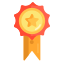

In [28]:
from PIL import Image

logo=Image.open('./image/top.png')

logo

In [29]:
print(logo.size)

(64, 64)


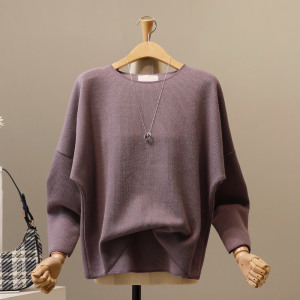

In [31]:
p=Image.open('./image/crawl/category_num1_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg')
p

In [32]:
#area=(0,0,64,64)
p=Image.open('./image/crawl/category_num1_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg')

area=(0,0,logo.width,logo.height) # (0,0) 영역에 붙인다라고 좌표 지정

p.paste(logo,area,logo) # png 파일 배경 투명하게 붙이는 방법

# 파일 저장
p.save('./image/crawl/category_num1_[logo]모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg')
p.close()
logo.close()

In [34]:
pwd # 경로 확인

'c:\\Dev_work'

## 디렉토리안 파일리스트 가져오기

In [35]:
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList

['category_num1_[logo]모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg',
 'category_num1_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 'category_num1_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg',
 'category_num1_쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈.jpg',
 'category_num1_제이프랑 가을신상 티셔츠팬츠긴팔셋업.jpg',
 'category_num1_패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품.jpg',
 'category_num2_[디즈니]슈라모드디즈니 외 FW 1+1단품 거실화 털슬리퍼.jpg',
 'category_num2_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외).jpg',
 'category_num2_[투투삭스]균일가 착용감 좋은 양말발목중목패션학생.jpg',
 'category_num2_가을 신상 은침귀걸이 우영우 고래귀걸이 원터치 링 스터드.jpg',
 'category_num2_보가 가을신상 슬링백블로퍼펌프스스니커즈.jpg',
 'category_num3_[맥퀸뉴욕]1+1 워터 벨벳 픽싱틴트 촉촉한 수분 블러링틴트 외 아이라이너아이브로우멀티밤~75%.jpg',
 'category_num3_[에뛰드]에뛰드 개강한세일 UPTO 55%.jpg',
 'category_num3_[에바스]로에랑스 퍼퓸 바디미스트샤워코롱 250ml(+행사중).jpg',
 'category_num3_[우르오스][우르오스] 스킨워시 500ml x 2개 (914  스킨로션 15ml + 스킨밀크 15ml 증정).jpg',
 'category_num3_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg',
 'category_num4_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'category_num4_[버블트리]주

## 카테고리별 1등 파일에만 1등 로고합성하기

* 디렉토리에 있는 파일 리스트 파악하기
* 파일이름(문자열)에서 내가 찾고싶은 문자를 포함한 파일 찾기
* 로고 붙이기 (검증된 내용)과 코드 조합하기

In [40]:

import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList

['category_num1_1위_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 'category_num1_2위_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg',
 'category_num1_3위_패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품.jpg',
 'category_num1_4위_제이프랑 가을신상 티셔츠팬츠긴팔셋업.jpg',
 'category_num1_5위_쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈.jpg',
 'category_num2_1위_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외).jpg',
 'category_num2_2위_[투투삭스]균일가 착용감 좋은 양말발목중목패션학생.jpg',
 'category_num2_3위_보가 가을신상 슬링백블로퍼펌프스스니커즈.jpg',
 'category_num2_4위_[디즈니]슈라모드디즈니 외 FW 1+1단품 거실화 털슬리퍼.jpg',
 'category_num2_5위_가을 신상 은침귀걸이 우영우 고래귀걸이 원터치 링 스터드.jpg',
 'category_num3_1위_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg',
 'category_num3_2위_[맥퀸뉴욕]1+1 워터 벨벳 픽싱틴트 촉촉한 수분 블러링틴트 외 아이라이너아이브로우멀티밤~75%.jpg',
 'category_num3_3위_[우르오스][우르오스] 스킨워시 500ml x 2개 (914  스킨로션 15ml + 스킨밀크 15ml 증정).jpg',
 'category_num3_4위_[에뛰드]에뛰드 개강한세일 UPTO 55%.jpg',
 'category_num3_5위_[에바스]로에랑스 퍼퓸 바디미스트샤워코롱 250ml(+행사중).jpg',
 'category_num4_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'category_num4_1위_[알로앤루]12%중복쿠폰 알로 알퐁소 가을신상오픈.j

In [43]:
fileList[0]

'category_num1_1위_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg'

In [44]:
len(fileList)

22

In [45]:
fileList[0].find('1위')

14

In [46]:
fileList[1].find('1위')

-1

In [19]:

from PIL import Image
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList
logo=Image.open('./image/top.png')

for file in fileList:
    if file.find('1위') != -1: # 파일명에 1위가 있다면
        # print(file)

        p=Image.open(f'./image/crawl/{file}')
        print(p)
        area=(0,0,logo.width,logo.height)
        p.paste(logo,area,logo)

        p.save(f'./image/crawl/[logo]{file}')
        p.close()
        
   
logo.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x20E05FFF2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x20E06AA6CD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x20E05FFF610>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x20E05FFFE50>
